#IMPORTS

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

#DATA PREP

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/DATA/towers.csv")
df.set_index("Year",inplace=True)
df

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12
Year,,,,,,,,,,,,
2012,276.2,324.5,158.6,412.5,292.8,258.4,334.1,303.2,292.9,243.2,159.7,331.2
2013,251.6,287.3,349.5,297.4,227.8,453.6,321.5,451.0,466.2,307.5,421.1,455.1
2014,192.7,433.2,289.9,366.3,466.2,239.1,357.4,219.7,245.7,411.1,357.0,353.2
2015,246.2,232.4,243.7,372.5,460.4,158.9,298.7,314.5,256.6,327.0,296.5,423.0
2016,291.7,311.0,502.4,254.0,245.6,324.8,401.0,266.5,251.3,289.9,255.4,362.1
2017,466.5,158.9,223.5,425.1,251.4,321.0,315.4,317.4,246.2,277.5,304.2,410.7
2018,258.6,327.4,432.1,403.9,256.6,282.9,389.7,413.2,466.5,199.3,282.1,387.6
2019,453.4,365.5,357.6,258.1,278.8,467.2,355.2,228.5,453.6,315.6,456.3,407.2
2020,158.5,271.0,410.2,344.2,250.0,360.7,376.4,179.4,159.2,342.4,331.2,377.7


#EXPLORATION

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 2012 to 2021
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      10 non-null     float64
 1   x2      10 non-null     float64
 2   x3      10 non-null     float64
 3   x4      10 non-null     float64
 4   x5      10 non-null     float64
 5   x6      10 non-null     float64
 6   x7      10 non-null     float64
 7   x8      10 non-null     float64
 8   x9      10 non-null     float64
 9   x10     10 non-null     float64
 10  x11     10 non-null     float64
 11  x12     10 non-null     float64
dtypes: float64(12)
memory usage: 1.0 KB


In [ ]:
df.describe()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.00000,10.000000,10.000000,10.00000,10.000000
mean,292.020000,311.770000,320.320000,342.220000,292.220000,315.150000,343.990000,303.71000,312.160000,299.470000,310.72000,391.890000
std,100.196405,80.927046,108.244372,64.030701,94.103416,94.200203,38.047936,85.07349,109.396214,57.247223,86.51358,36.829893
min,158.500000,158.900000,158.600000,254.000000,192.600000,158.900000,290.500000,179.40000,159.200000,199.300000,159.70000,331.200000
25%,247.550000,275.075000,237.700000,290.500000,246.700000,264.525000,316.925000,238.00000,247.475000,278.425000,262.07500,366.000000
50%,267.400000,317.750000,319.700000,355.250000,254.000000,302.950000,344.650000,308.85000,270.000000,298.700000,300.35000,397.400000
75%,316.525000,355.975000,397.050000,396.050000,289.300000,351.725000,371.650000,337.12500,413.425000,324.150000,350.55000,411.000000
max,466.500000,433.200000,502.400000,425.100000,466.200000,467.200000,401.000000,451.00000,466.500000,411.100000,456.30000,455.100000


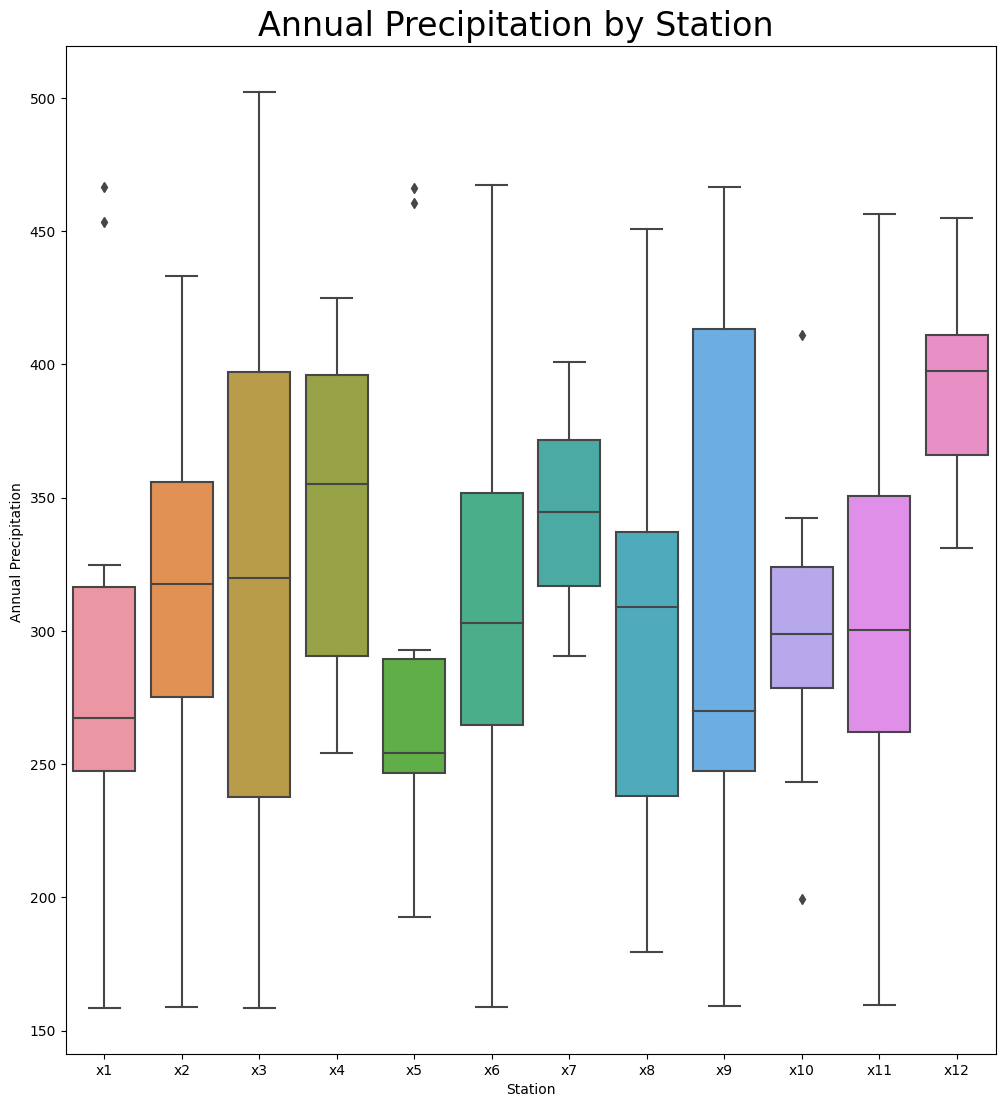

In [ ]:
fig, ax = plt.subplots()
ax = sns.boxplot(df)
fig.suptitle('Annual Precipitation by Station', fontsize=24)
ax.set_ylabel('Annual Precipitation ')
ax.set_xlabel('Station')
fig.set_size_inches(12, 12)
fig.subplots_adjust(top=0.95)
fig.savefig('towerbox.png', dpi=100)
plt.show()

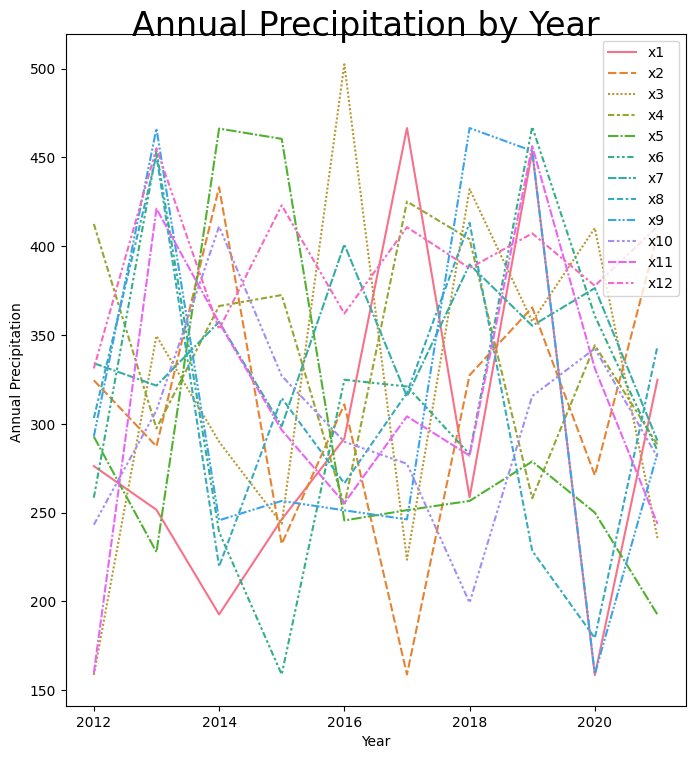

In [ ]:
fig, ax = plt.subplots()
ax = sns.lineplot(df)
fig.suptitle('Annual Precipitation by Year', fontsize=24)
ax.set_ylabel('Annual Precipitation ')
ax.set_xlabel('Year')
fig.set_size_inches(8, 8)
fig.subplots_adjust(top=0.95)
fig.savefig('towerline.png', dpi=100)
plt.show()

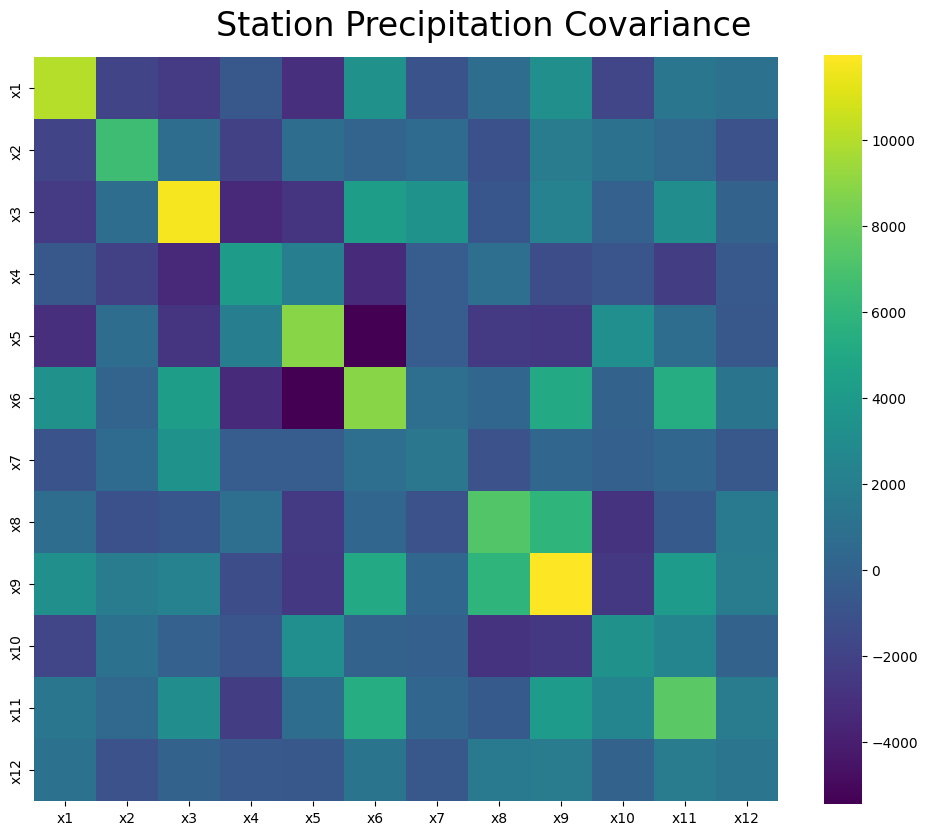

In [ ]:
fig, ax = plt.subplots()

cov = df.cov()
#mask = np.zeros_like(cov, dtype=bool)
#mask[np.triu_indices_from(mask)] = True
sns.heatmap(cov, square=True, cbar_kws={"shrink": 0.6}, cmap="viridis")

fig.suptitle('Station Precipitation Covariance', fontsize=24)
fig.set_size_inches(12, 12)
fig.subplots_adjust(top=1.15)
fig.savefig('towercovarriance.png', dpi=100)
plt.show()

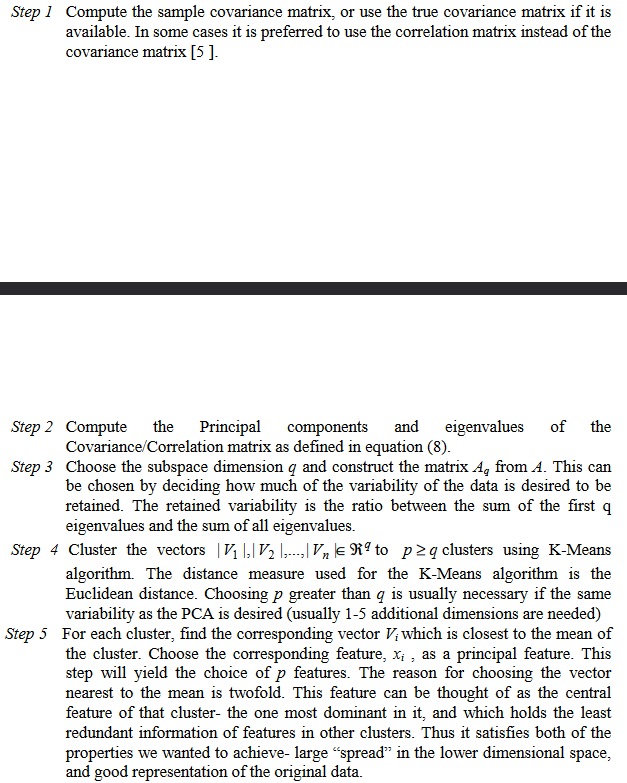

https://realpython.com/k-means-clustering-python/

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/DATA/towers.csv")
df.set_index("Year",inplace=True)
print(df)
dfMCent = df-df.mean()
print(dfMCent)
sigma = dfMCent.cov()
print(sigma)

         x1     x2     x3     x4     x5     x6     x7     x8     x9    x10  \
Year                                                                         
2012  276.2  324.5  158.6  412.5  292.8  258.4  334.1  303.2  292.9  243.2   
2013  251.6  287.3  349.5  297.4  227.8  453.6  321.5  451.0  466.2  307.5   
2014  192.7  433.2  289.9  366.3  466.2  239.1  357.4  219.7  245.7  411.1   
2015  246.2  232.4  243.7  372.5  460.4  158.9  298.7  314.5  256.6  327.0   
2016  291.7  311.0  502.4  254.0  245.6  324.8  401.0  266.5  251.3  289.9   
2017  466.5  158.9  223.5  425.1  251.4  321.0  315.4  317.4  246.2  277.5   
2018  258.6  327.4  432.1  403.9  256.6  282.9  389.7  413.2  466.5  199.3   
2019  453.4  365.5  357.6  258.1  278.8  467.2  355.2  228.5  453.6  315.6   
2020  158.5  271.0  410.2  344.2  250.0  360.7  376.4  179.4  159.2  342.4   
2021  324.8  406.5  235.7  288.2  192.6  284.9  290.5  343.7  283.4  281.2   

        x11    x12  
Year                
2012  159.7  331.2  


In [ ]:
Lambda, A = np.linalg.eig(sigma)
idx = Lambda.argsort()[::-1]   
Lambda = Lambda[idx]
A = A[:,idx]
print(pd.DataFrame(Lambda))
print(pd.DataFrame(A))

pd.DataFrame(Lambda).to_csv("eigenvalues.csv")
pd.DataFrame(A).to_csv("eigenvectors.csv")

               0
0   2.786277e+04
1   1.748759e+04
2   1.125619e+04
3   1.096412e+04
4   6.947160e+03
5   4.565287e+03
6   2.622265e+03
7   7.889335e+02
8   4.110559e+02
9   1.422234e-12
10 -5.730921e-13
11 -9.013285e-13
          0         1         2         3         4         5         6   \
0   0.251886 -0.408571  0.531705  0.221142  0.124236 -0.543802 -0.224136   
1   0.026632  0.222418 -0.099819 -0.318327  0.788314 -0.024358 -0.017887   
2   0.325807  0.559313 -0.354307  0.216718 -0.267472 -0.400225 -0.200187   
3  -0.208285 -0.232000 -0.089073 -0.045498 -0.264655 -0.106468  0.634174   
4  -0.356359  0.155148  0.191665 -0.557630 -0.234389 -0.359556 -0.054755   
5   0.488823  0.128040  0.243903  0.146746  0.032796  0.332871  0.394410   
6   0.051036  0.184686 -0.125406  0.084172 -0.014937 -0.262935  0.260464   
7   0.199272 -0.392367 -0.409106 -0.231153 -0.197912  0.233572 -0.335509   
8   0.513913 -0.214511 -0.187462 -0.518445  0.050822 -0.235871  0.208927   
9  -0.106304  0.273

In [ ]:
CUT = 0.8
screes = []
cumulative = []
sum = Lambda.sum()
cum = 0
flag = True
for index in range(len(A)):
    screes.append(Lambda[index]/sum)
    cum+=Lambda[index]
    cumulative.append(cum/sum)
    if cumulative[index]>=CUT and flag:
        flag=False
        cutoff = index
        cutoffV = cumulative[index]
        print("PC{} reaches a minimum variance value of {:.1%} the total variance with {:.1%} of the variance.".format(cutoff+1, CUT, cutoffV))

PC4 reaches a minimum variance value of 80.0% the total variance with 81.5% of the variance.


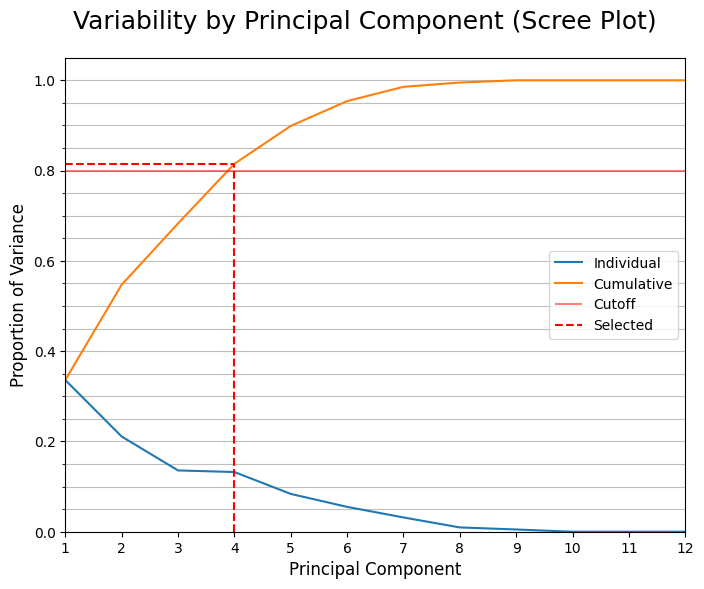

In [ ]:
fig, ax = plt.subplots()

plt.plot(screes, label="Individual")
plt.plot(cumulative, label="Cumulative")

plt.hlines(0.8, color='r', xmin=0, xmax=12, alpha=.5, label="Cutoff")
plt.hlines(cutoffV, color='r', linestyle='dashed', xmin=0, xmax=cutoff, label="Selected")
plt.vlines(cutoff, color='r', linestyle='dashed',ymin=0,ymax=cutoffV)

fig.suptitle('Variability by Principal Component (Scree Plot)', fontsize=18)
ax.set_ylabel('Proportion of Variance', fontsize=12)
ax.set_xlabel('Principal Component', fontsize=12)
ax.legend(loc='center right')

ax.set_xticks(range(len(A)), range(1, len(A)+1))
ax.set_xbound({0,11})
ax.set_ybound({0,1.05})

#ax.grid()
ax.yaxis.get_ticklocs(minor=True)
ax.minorticks_on()
ax.xaxis.set_tick_params(which='minor', bottom=False)
ax.grid(which='both', axis='y', alpha=.8)

fig.set_size_inches(8, 6)
fig.subplots_adjust(top=.9)
fig.savefig('towerscree.png', dpi=100)
plt.show()

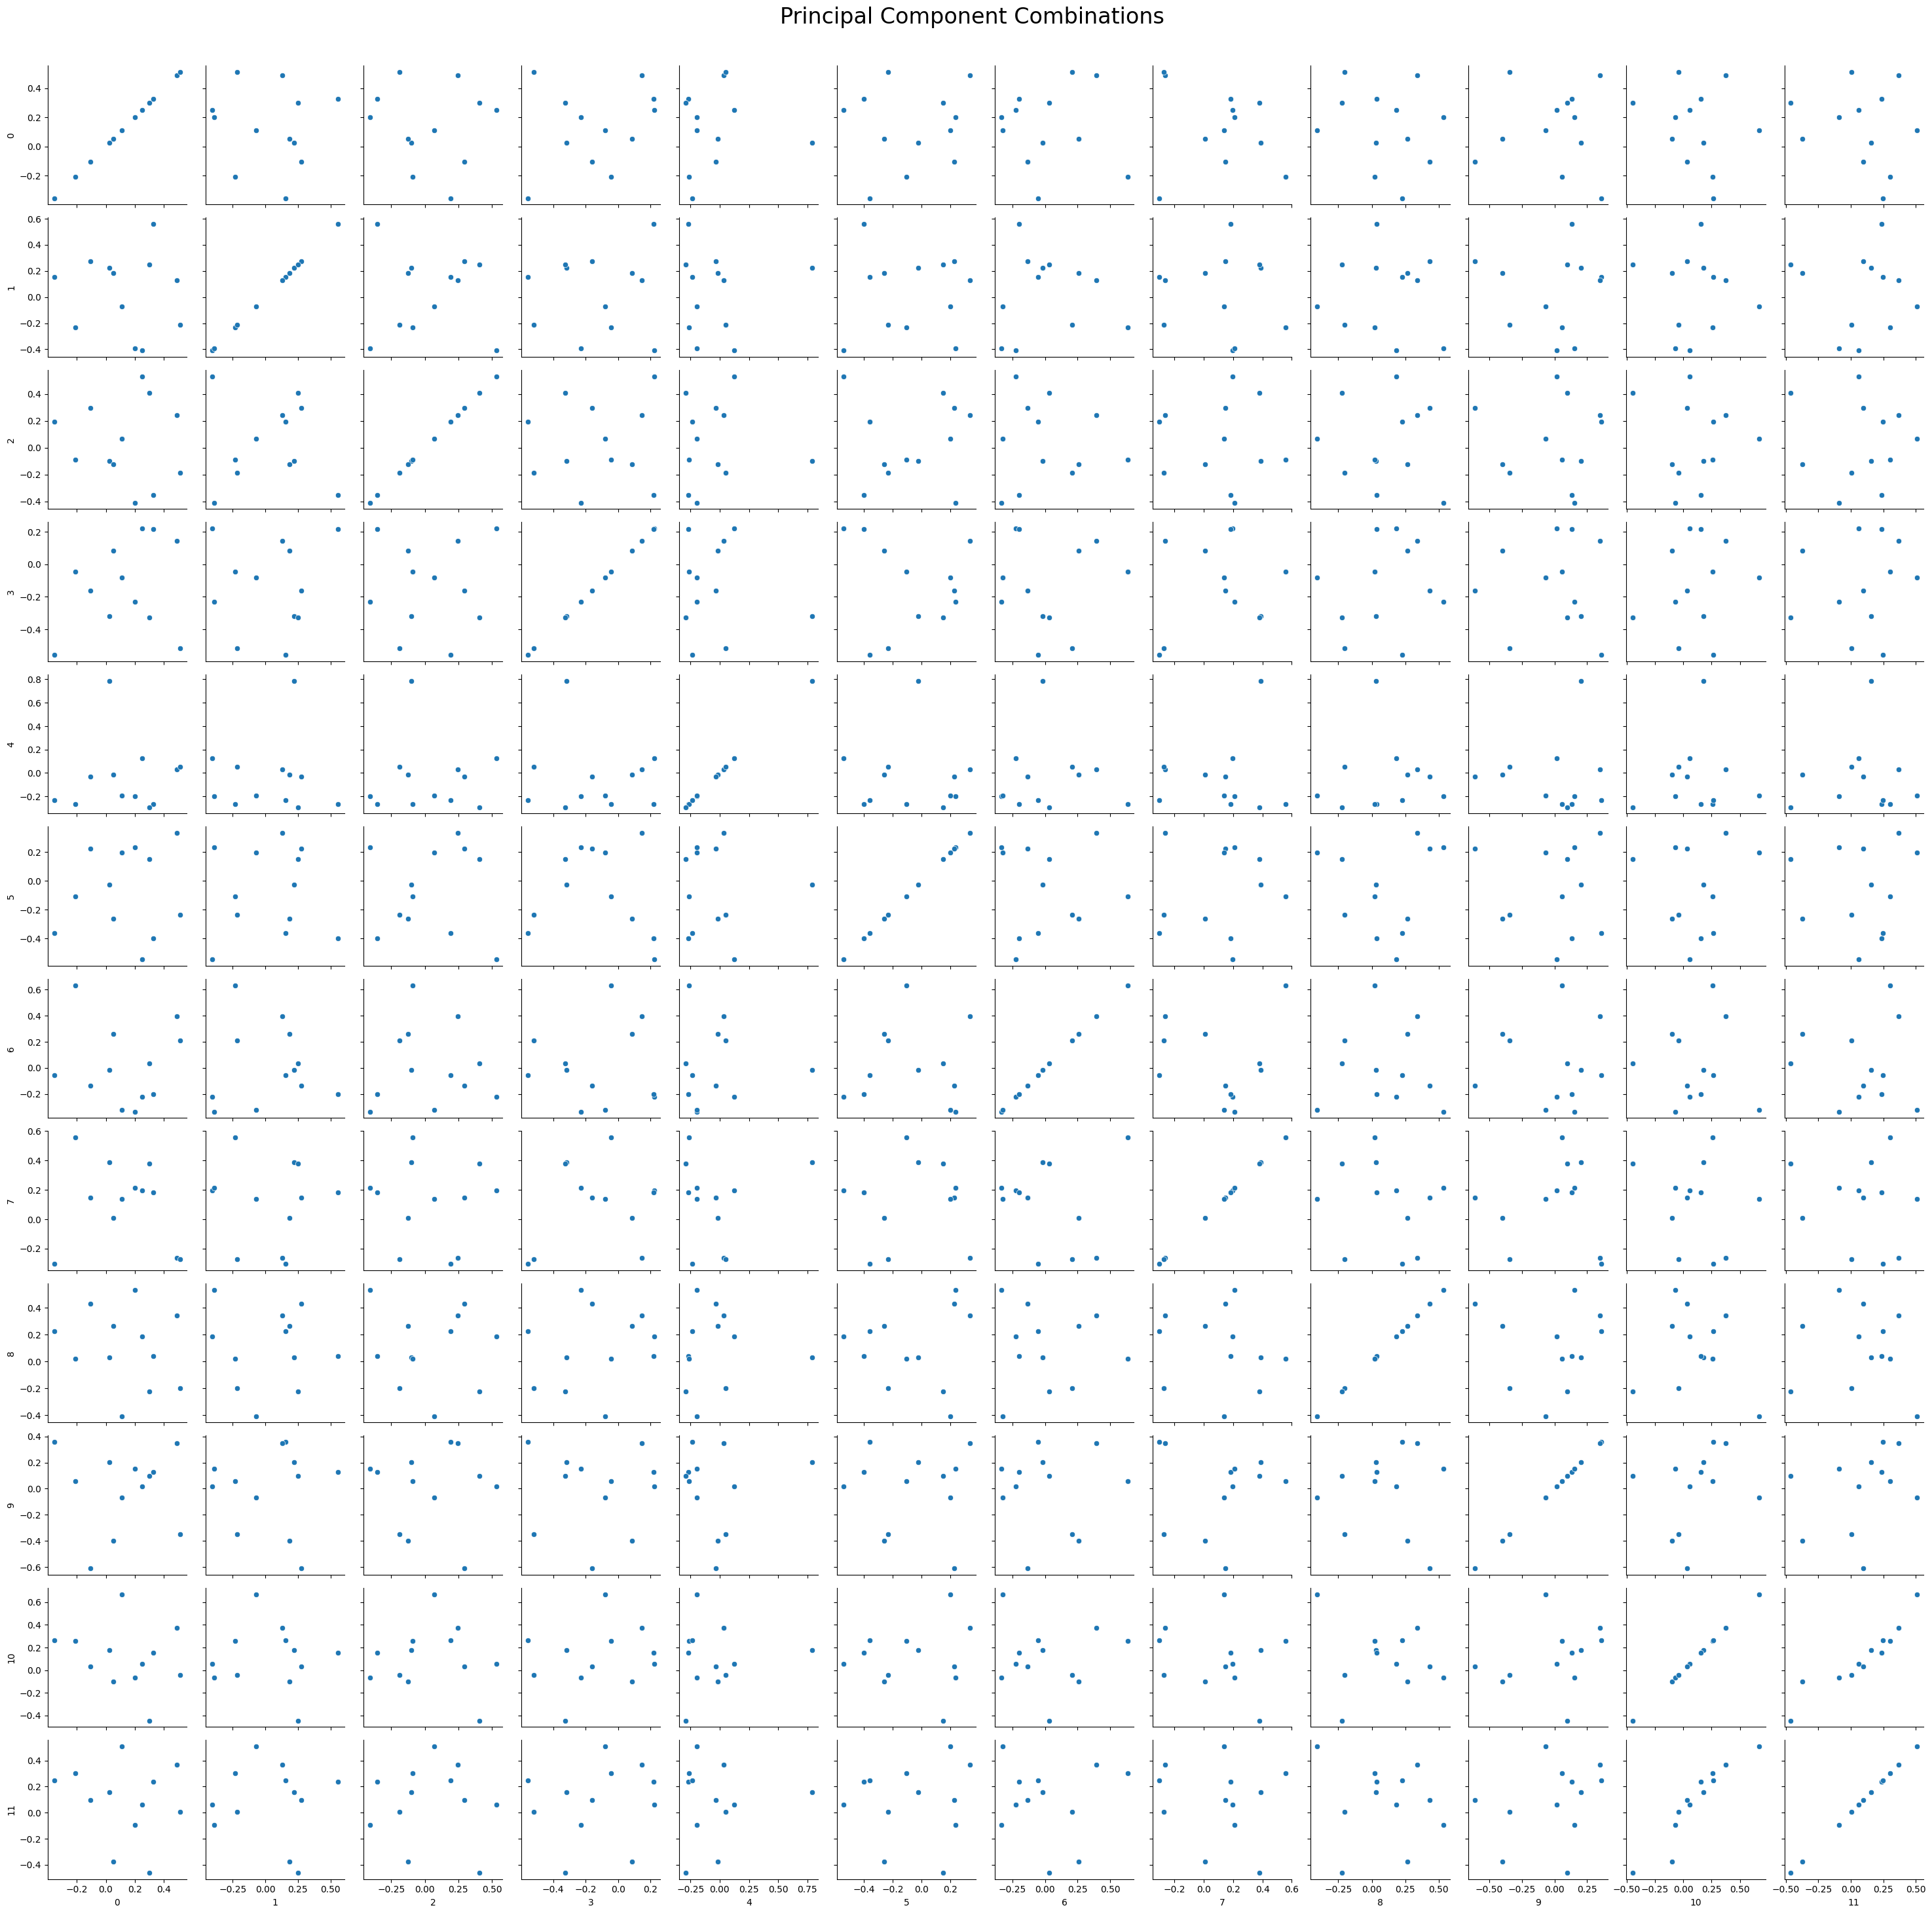

In [ ]:
ADF = pd.DataFrame(A)
g = sns.PairGrid(ADF)
g.map(sns.scatterplot)

g.fig.suptitle('Principal Component Combinations', fontsize=24)
g.fig.subplots_adjust(top=0.95)
g.fig.savefig('towerPCs.png', dpi=100)
g

Choosing subspace q = 4 as found above which will give us Variability of ~ 80%

In [ ]:
q = 4
Lambdaq = Lambda[0:q]
Aq = A[:,:q]
print(pd.DataFrame(Lambdaq))
print(pd.DataFrame(Aq))
print(pd.DataFrame(Aq @ Lambdaq @ Aq))

              0
0  27862.772897
1  17487.587737
2  11256.192777
3  10964.118775
           0         1         2         3
0   0.251886 -0.408571  0.531705  0.221142
1   0.026632  0.222418 -0.099819 -0.318327
2   0.325807  0.559313 -0.354307  0.216718
3  -0.208285 -0.232000 -0.089073 -0.045498
4  -0.356359  0.155148  0.191665 -0.557630
5   0.488823  0.128040  0.243903  0.146746
6   0.051036  0.184686 -0.125406  0.084172
7   0.199272 -0.392367 -0.409106 -0.231153
8   0.513913 -0.214511 -0.187462 -0.518445
9  -0.106304  0.273521  0.295868 -0.162105
10  0.300259  0.250184  0.408911 -0.326172
11  0.111785 -0.070698  0.068206 -0.079200
              0
0  27862.772897
1  17487.587737
2  11256.192777
3  10964.118775


In [ ]:
print(pd.DataFrame(Aq.T))

         0         1         2         3         4         5         6   \
0  0.251886  0.026632  0.325807 -0.208285 -0.356359  0.488823  0.051036   
1 -0.408571  0.222418  0.559313 -0.232000  0.155148  0.128040  0.184686   
2  0.531705 -0.099819 -0.354307 -0.089073  0.191665  0.243903 -0.125406   
3  0.221142 -0.318327  0.216718 -0.045498 -0.557630  0.146746  0.084172   

         7         8         9         10        11  
0  0.199272  0.513913 -0.106304  0.300259  0.111785  
1 -0.392367 -0.214511  0.273521  0.250184 -0.070698  
2 -0.409106 -0.187462  0.295868  0.408911  0.068206  
3 -0.231153 -0.518445 -0.162105 -0.326172 -0.079200  


Max:  0.19610638491141555  @: 4


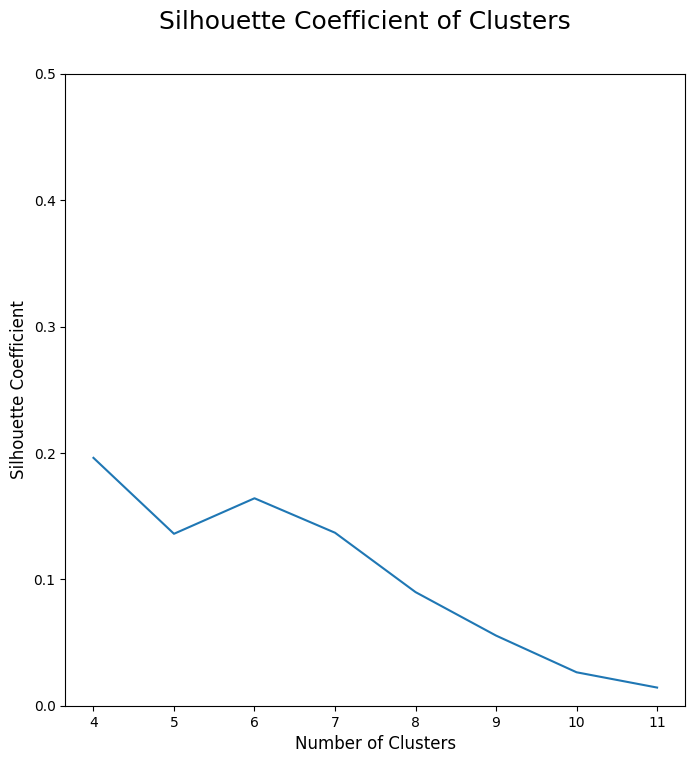

In [22]:
fig, ax = plt.subplots()
SSE = []
pRange = [q, len(Aq)]

for p in range(pRange[0], pRange[1]):
    kmeans = KMeans(n_clusters=p, n_init=10)
    kmeans.fit(Aq)
    score = silhouette_score(Aq, kmeans.labels_)
    SSE.append(score)

p = SSE.index(max(SSE))+q
print("Max: ", max(SSE), " @:", p)


plt.plot(range(pRange[0], pRange[1]), SSE)
plt.xticks(range(pRange[0], pRange[1]))
ax.set_ybound({0,.5})
#plt.axvline(p, color='red')
fig.suptitle('Silhouette Coefficient of Clusters', fontsize=18)
fig.set_size_inches(8,8)
plt.xlabel("Number of Clusters", fontsize=12)
plt.ylabel("Silhouette Coefficient", fontsize=12)
fig.subplots_adjust(top=.9)
fig.savefig("SILCOEF.png", dpi=100)
plt.show()

In [27]:
p=4
kmeans = KMeans(n_clusters=p, n_init=10)
kmeans.fit(Aq)

print(pd.DataFrame(kmeans.cluster_centers_))

          0         1         2         3
0  0.346989 -0.010116  0.394839  0.013906
1 -0.080249  0.088846  0.040240 -0.179765
2  0.325807  0.559313 -0.354307  0.216718
3  0.356592 -0.303439 -0.298284 -0.374799


In [31]:
clusters = []
keptFeatureIndexes = []
for cluster in kmeans.cluster_centers_:
    dists=[]
    for Vi in Aq:
        dists.append(np.linalg.norm(cluster-Vi)) # do a tie breaker
    clusters.append(dists)
#print(pd.DataFrame(clusters))

for cluster in clusters:
    #print(min(cluster), cluster.index(min(cluster)))
    minimum = min(cluster)
    indices = [i for i, v in enumerate(cluster) if v == minimum]
    print(indices, minimum, max(cluster))
    keptFeatureIndexes.append(cluster.index(min(cluster)))
keptFeatureIndexes.sort()
stationsKept = df.columns[keptFeatureIndexes]
#print(df[stationsKept])

[5] 0.2821917972159761 0.9628347638966697
[1] 0.26092414441462314 0.8717805962901405
[2] 0.0 1.314268156325444
[7] 0.25607356765926365 1.048007288483331


#VISUALIZATION

In [32]:
import matplotlib
from matplotlib import colors
cmap = matplotlib.colormaps['tab20']

cluster_cmap = colors.LinearSegmentedColormap.from_list(name=["0","1","2","3","4","5"], colors=cmap(range(0, 11, 2)))
data_cmap = colors.LinearSegmentedColormap.from_list(name=["0","1","2","3","4","5"], colors=cmap(range(1, 12, 2)))

From the above, we find the data point that is closest to each centroid. These points are the main drivers or most important parts of each cluster. Any other point in each cluster can be removed with minimal loss of variance. The corresponding stations to each cluster are as such according to our models:

```
x2     x3     x6     x8
```

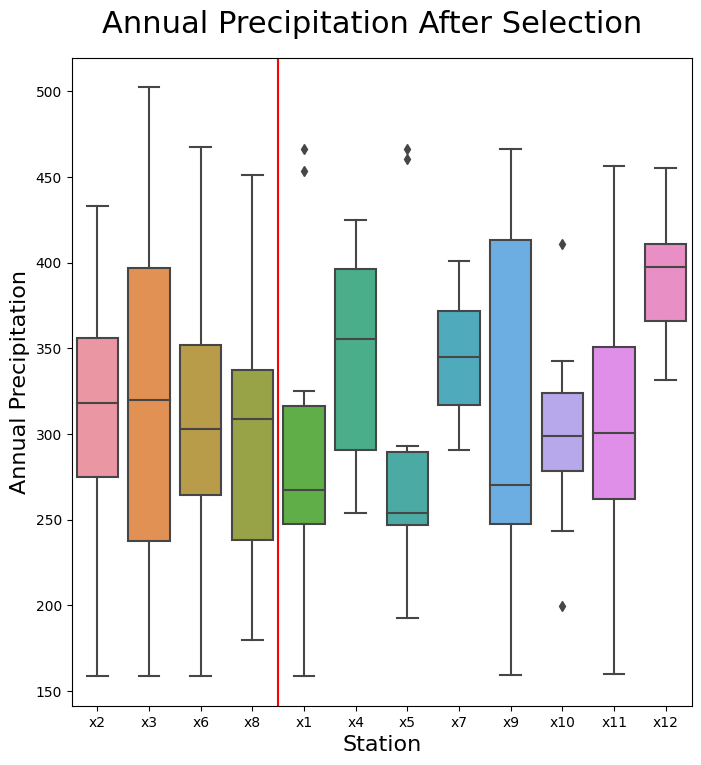

In [77]:
fig, ax = plt.subplots()
ax = sns.boxplot(df, order=["x2", "x3", "x6", "x8", "x1", "x4", "x5", "x7", "x9", "x10", "x11", "x12"])
fig.suptitle('Annual Precipitation After Selection', fontsize=22)
ax.set_ylabel('Annual Precipitation', fontsize=16)
ax.set_xlabel('Station', fontsize=16)
plt.axvline(3.5, color='red')
fig.set_size_inches(8, 8)
fig.subplots_adjust(top=.92)
fig.savefig('towerbox2.png', dpi=100)
plt.show()

<ipython-input-76-fcb143f5b2d3>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ADF = ADF.append(CDF, ignore_index = True)


         PC1       PC2       PC3       PC4  Cluster Index     Vector Type
0   0.251886 -0.408571  0.531705  0.221142              0  Station Vector
1   0.026632  0.222418 -0.099819 -0.318327              1  Station Vector
2   0.325807  0.559313 -0.354307  0.216718              2  Station Vector
3  -0.208285 -0.232000 -0.089073 -0.045498              1  Station Vector
4  -0.356359  0.155148  0.191665 -0.557630              1  Station Vector
5   0.488823  0.128040  0.243903  0.146746              0  Station Vector
6   0.051036  0.184686 -0.125406  0.084172              1  Station Vector
7   0.199272 -0.392367 -0.409106 -0.231153              3  Station Vector
8   0.513913 -0.214511 -0.187462 -0.518445              3  Station Vector
9  -0.106304  0.273521  0.295868 -0.162105              1  Station Vector
10  0.300259  0.250184  0.408911 -0.326172              0  Station Vector
11  0.111785 -0.070698  0.068206 -0.079200              1  Station Vector
12  0.346989 -0.010116  0.394839  0.01

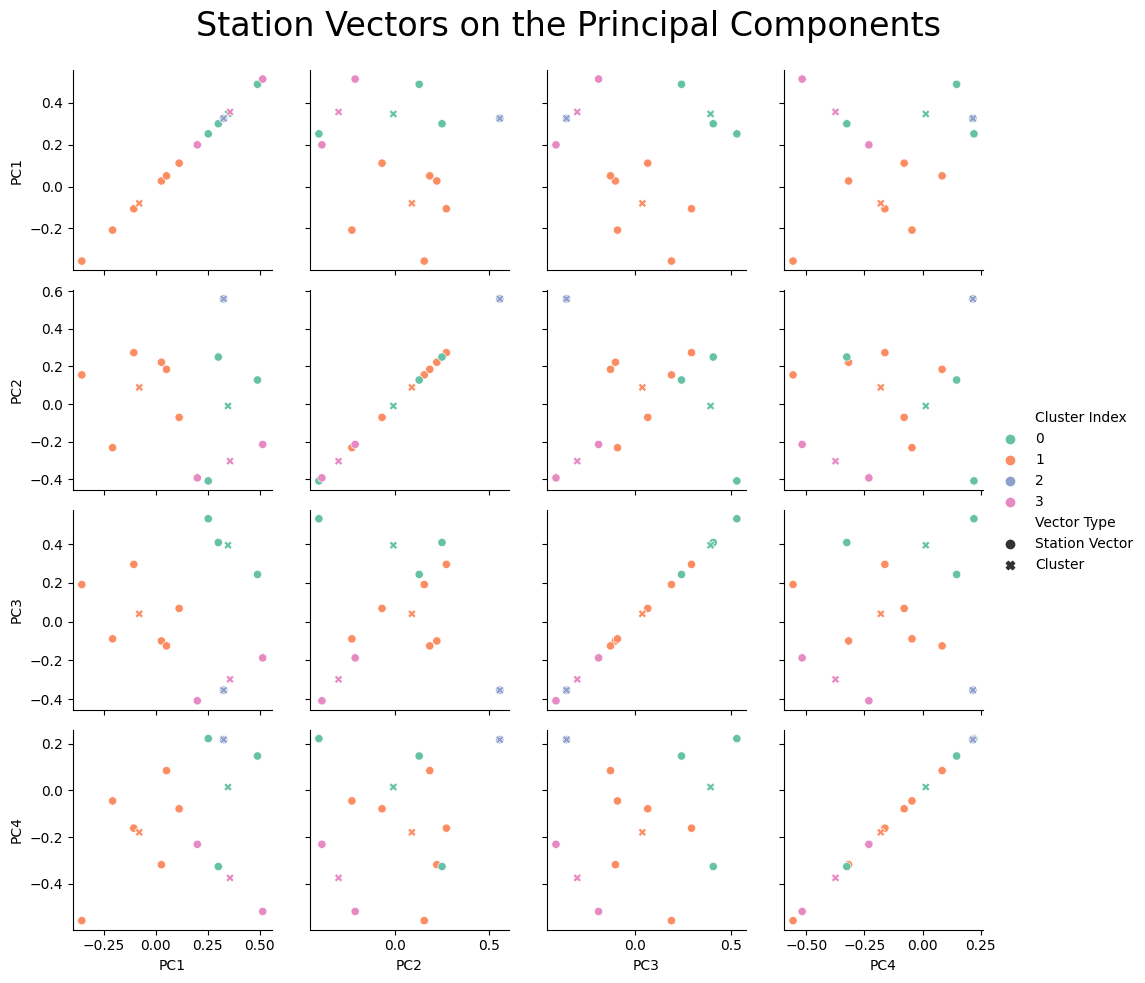

In [76]:
#qualitative_colors = sns.color_palette("Set3", 4)
ADF = pd.DataFrame(Aq)
ADF.columns = ["PC1", "PC2", "PC3", "PC4"]
ADF['Cluster Index'] = kmeans.labels_
ADF['Vector Type'] = ['Station Vector']*12
CDF = pd.DataFrame(kmeans.cluster_centers_)
CDF.columns = ["PC1", "PC2", "PC3", "PC4"]
CDF['Cluster Index'] = [0,1,2,3]
CDF['Vector Type'] = ['Cluster']*4
ADF = ADF.append(CDF, ignore_index = True)
#ADF.dropna(axis=0, inplace=True)
#ADF['markers'] = ['.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '^', '^', '^', '^']
print(ADF)
#ADF['cluster'] = kmeans.labels_
g = sns.PairGrid(ADF.iloc[:,:4])
g.map(sns.scatterplot, hue=ADF['Cluster Index'], style=ADF['Vector Type'], palette='Set2')
#print(kmeans.labels_)
#h = sns.PairGrid(CDF)
#h.map(sns.scatterplot, c=[0,1,2,3], marker='^')

g.fig.suptitle('Station Vectors on the Principal Components', fontsize=24)
g.fig.subplots_adjust(top=0.92)
g.add_legend()
g.fig.savefig('towerPCsAFTERPCA.png', dpi=100)
g